In [6]:
import pandas as pd
import numpy as np
from scipy import spatial
import seaborn as sns

In [7]:
dataset = pd.read_csv("../input_data/AdmissionDataset/data.csv")

In [3]:
# Adding bias vector to the dataset with values 1

In [4]:
dataset.insert(loc=0, column='intercept', value=np.ones(len(dataset)))

In [5]:
dataset.head()

,intercept,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,1.0,334,319,108,3,3.0,3.5,8.54,1,0.71
2,1.0,4,322,110,3,3.5,2.5,8.67,1,0.80
3,1.0,45,326,113,5,4.5,4.0,9.40,1,0.91
4,1.0,232,319,106,3,3.5,2.5,8.33,1,0.74


In [41]:
# Plotting the dataset attributes with respect to output 

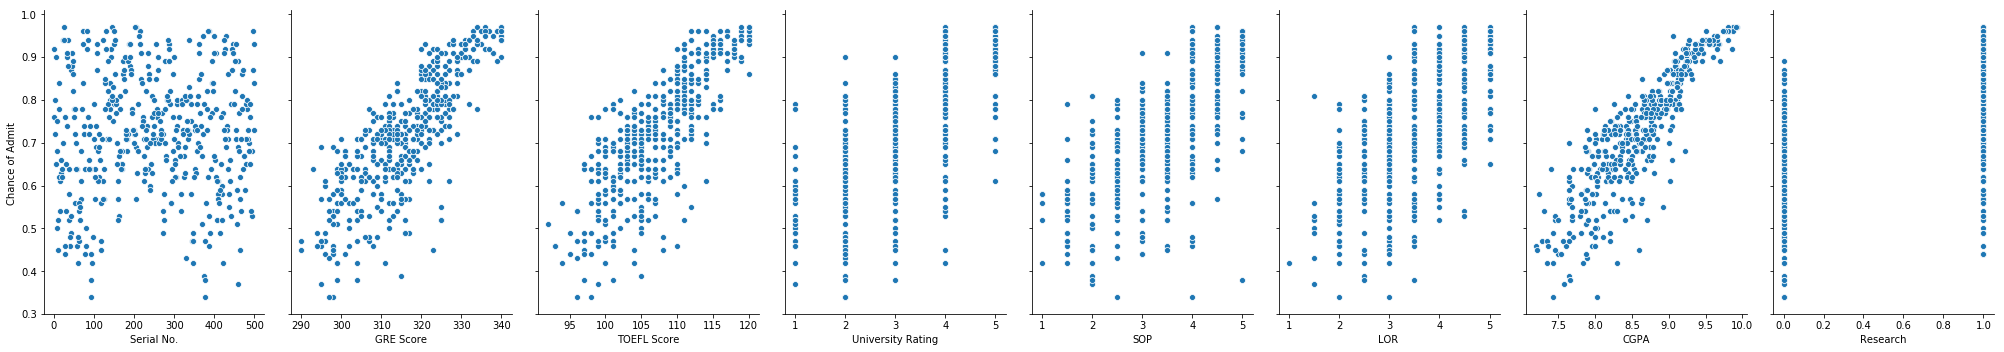

In [42]:
sns.pairplot(dataset, x_vars=['Serial No.', 'GRE Score', 'TOEFL Score',
       'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research',], y_vars='Chance of Admit ', height=5, aspect=0.7)

In [43]:
def train_validate_test_split(dataset):
    size = len(dataset)
    tsize = int(size*0.6)
    vsize = int(size*0.8)
    training_data = dataset.iloc[:tsize].reset_index(drop=True)
    validation_data = dataset.iloc[tsize:vsize].reset_index(drop=True)
    testing_data = dataset.iloc[vsize:].reset_index(drop=True)
    return training_data,validation_data,testing_data

In [44]:
def predict(X,weights):
    return np.dot(X,weights)

In [45]:
def meansquareerror(X,weights,y):
    preds = predict(X,weights)
    return ((preds - y)**2).mean()

In [46]:
def meanabsoluteerror(X,weights,y):
    preds = predict(X,weights)
    return (np.abs(preds - y)).mean()

In [47]:
def meanpercentageerror(X,weights,y):
    preds = predict(X,weights)
    return 100*((preds - y)**2).mean()

In [48]:
def linearRegressionGD(X,y,lr=0.001,iter=60):
    weights = np.random.rand(len(X.columns))
    for i in range(iter):
        preds = predict(X,weights)
        weights[0] = weights[0] - lr *(preds - y).mean()
        for j in range(1,len(X.columns)):
            temp = X.iloc[:, [j]].values
            x = np.reshape(temp,temp.shape[0])
            weights[j] = weights[j] - (lr *((preds - y)* x).mean())
#         print(cost)
    return weights

In [49]:
def statistics(weights,data):
    X = data.drop('Chance of Admit ',axis=1)
    y = data['Chance of Admit ']
    costfunctionnames = ['mean square error','mean absolute error','mean percentage error']
    costfunctions = [meansquareerror,meanabsoluteerror,meanpercentageerror]
    for i in range(len(costfunctions)):
        cost = costfunctions[i](X,weights,y)
        print(costfunctionnames[i],":",cost)

In [50]:
def sklearnlinearreg(data):
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, r2_score
    regr = linear_model.LinearRegression()
    X = data[0].drop('Chance of Admit ',axis=1)
    y = data[0]['Chance of Admit ']
    regr.fit(X,y)
    print("Stats Training Data:")
    statistics(regr.coef_,data[0])
    print("\n\n")
    print("Stats on validation data")
    statistics(regr.coef_,data[1])
    print("\n\n")
    print("Stats on testing data")
    statistics(regr.coef_,data[2])

In [51]:
training_data,validation_data,testing_data = train_validate_test_split(dataset)
X = training_data.drop('Chance of Admit ',axis=1)
y = training_data['Chance of Admit ']
# for costf in costfunctions:
weights= linearRegressionGD(X,y)
print("Training Data:")
statistics(weights,training_data)
print("\nValidation Data")
statistics(weights,validation_data)
print("\nTesting Data")
statistics(weights,testing_data)

Training Data:
mean square error : 1.6388191256489647e+275
mean absolute error : 3.951642291750351e+137
mean percentage error : 1.6388191256489647e+277

Validation Data
mean square error : 1.703661792270854e+275
mean absolute error : 4.040714157212202e+137
mean percentage error : 1.703661792270854e+277

Testing Data
mean square error : 1.6642850149218076e+275
mean absolute error : 3.9777817066473254e+137
mean percentage error : 1.6642850149218075e+277


In [52]:
print(weights)

[2.20590681e+132 6.08675463e+134 6.98470634e+134 2.36545713e+134
 6.91653539e+132 7.48097662e+132 7.78762430e+132 1.89345891e+133
 1.25918995e+132]


In [53]:
# SkLearn library results

In [54]:
sklearnlinearreg([training_data,validation_data,testing_data])

Stats Training Data:
mean square error : 2.2077615493940366
mean absolute error : 1.484737847593895
mean percentage error : 220.77615493940365



Stats on validation data
mean square error : 2.1939267651345604
mean absolute error : 1.4800848017925097
mean percentage error : 219.39267651345605



Stats on testing data
mean square error : 2.2275564492524307
mean absolute error : 1.4910087074806342
mean percentage error : 222.75564492524308


In [55]:
# Observations:
# The regression performance is given in the results. The reason for the error can be differene between the attribute values,
# the values are not same in type and range that is causing high error. There is also a chance that the attributes
# are not correlated.